In [8]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize the kernels with t-SNE

In [2]:
CT_kernel_dir = '../vMFNet/checkpoints/reconstruct_CT/kernels/init/dictionary/dictionary_12.pickle'
MRI_kernel_dir = '../vMFNet/checkpoints/reconstruct_MR/kernels/init/dictionary/dictionary_12.pickle'

In [3]:
vc_CT = np.load(CT_kernel_dir, allow_pickle=True)
vc_CT = vc_CT[:, :, np.newaxis, np.newaxis]
vc_CT = torch.from_numpy(vc_CT).type(torch.FloatTensor).squeeze(-1).squeeze(-1)
print(vc_CT.shape)

torch.Size([12, 64])


In [4]:
vc_MR = np.load(MRI_kernel_dir, allow_pickle=True)
vc_MR = vc_MR[:, :, np.newaxis, np.newaxis]
vc_MR = torch.from_numpy(vc_MR).type(torch.FloatTensor).squeeze(-1).squeeze(-1)
print(vc_MR.shape)

torch.Size([12, 64])


# t-SNE


In [5]:
vc_CT_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(vc_CT)

In [6]:
print(vc_CT_embedded.shape)
print(vc_CT_embedded)

(12, 2)
[[   3.144961    41.364746 ]
 [  67.39081    -75.98076  ]
 [  84.41619    -41.67461  ]
 [-120.34192     49.12257  ]
 [-130.92532     17.659458 ]
 [  35.672268    57.839558 ]
 [ -14.05931    -83.21247  ]
 [ -77.78156     62.38358  ]
 [  87.83063      3.2153304]
 [ -27.667542   -54.308804 ]
 [  69.39774     36.001987 ]
 [ -47.616077    83.404755 ]]


In [13]:
vc_MR_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(vc_MR)

In [14]:
print(vc_MR_embedded.shape)
print(vc_MR_embedded)

(12, 2)
[[ 41.201286    19.896788  ]
 [-14.624655   -68.349754  ]
 [ 21.43292     95.71055   ]
 [ 41.430065    46.843548  ]
 [ 17.00366    -24.942482  ]
 [-27.95789    -53.070267  ]
 [-33.42242     22.453913  ]
 [ 33.667492    -1.0122786 ]
 [-31.910702     3.5551486 ]
 [ 20.006039    62.522453  ]
 [  0.62280154 -43.71781   ]
 [ 37.81572     79.61072   ]]


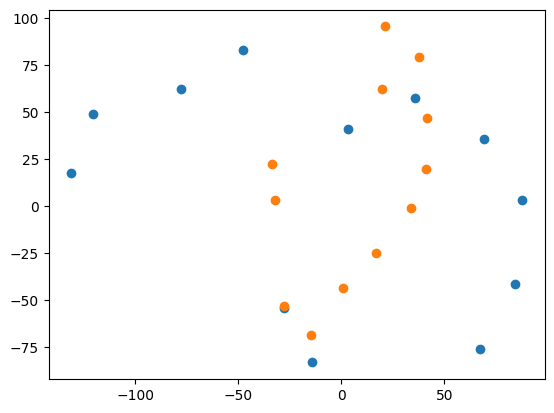

In [15]:
# plot the vc_CT_embedded and vc_MR_embedded
plt.scatter(vc_CT_embedded[:, 0], vc_CT_embedded[:, 1])
plt.scatter(vc_MR_embedded[:, 0], vc_MR_embedded[:, 1])
plt.show()